# Lab 1 - ELE - 33
## Alunos: Ana Paula Lopes Schuch
## Artur Assis Alves

In [ ]:
#Run this cell to get the tools.py file:
!rm -f tools.py                                        #Remove tools.py ignoring if tools.py does not exist.
!git clone 'https://github.com/ArturAssisComp/Hamming-Code-Simulation.git'
!mv Hamming-Code-Simulation/tools/tools.py "/content/tools"  #Move tools.py to /content
!mkdir plots
!rm -rf Hamming-Code-Simulation/                       #Delete directory Hamming-Code-Simulation.

In [1]:
#Run 'Git Commands' before importing tools.
import sys
sys.path.append(".")
import tools as tl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import time

Initiate process:
p = 0.5        (T:130.4 s)
p = 0.403554   (T:127.6 s)
p = 0.325712   (T:113.4 s)
p = 0.262885   (T:127.6 s)
p = 0.212177   (T:110.8 s)
p = 0.17125    (T:107.1 s)
p = 0.138217   (T:107.8 s)
p = 0.111556   (T:111.8 s)
p = 0.0900381  (T:114.8 s)
p = 0.0726706  (T:111.2 s)
p = 0.0586531  (T:110.3 s)
p = 0.0473394  (T:102.1 s)
p = 0.038208   (T:114.2 s)
p = 0.030838   (T:105.4 s)
p = 0.0248897  (T:108.4 s)
p = 0.0200887  (T:104.8 s)
p = 0.0162137  (T:105.6 s)
p = 0.0130862  (T:107.9 s)
p = 0.010562   (T:107.6 s)
p = 0.0085247  (T:105.9 s)
p = 0.00688036 (T:111.1 s)
p = 0.0055532  (T:105.4 s)
p = 0.00448204 (T:103.6 s)
p = 0.00361749 (T:107.4 s)
p = 0.00291971 (T:108.1 s)
p = 0.00235652 (T:108.6 s)
p = 0.00190197 (T:104.9 s)
p = 0.0015351  (T:104.8 s)
p = 0.00123899 (T:105.4 s)
p = 0.001      (T:106.7 s)
Completed in 3.301e+03s


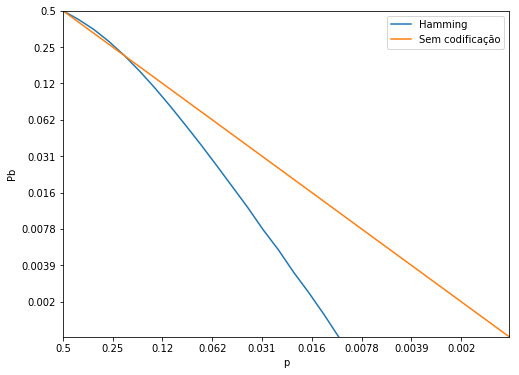

In [2]:
pb = []
p_vector = []
vp = np.logspace(math.log(0.5, 2), math.log(0.001, 2), 30, base=2)
ini = time.time()
print("Initiate process:")
for p in vp:
    ini_cycle = time.time()
    p_vector.append(p)
    number_information_words = 1000000 
    information_words, code_words = tl.generate_information_and_codewords(number_information_words)
    received_words = tl.binary_symmetric_channel(code_words, p)
    decoder_words = tl.decoder(received_words)
    pb.append(tl.comparator(information_words, decoder_words))
    print("p = {:<10.6} (T:{:<5.4} s)".format(p, time.time() - ini_cycle))
print("Completed in {:.4}s".format(time.time() - ini))

x = np.linspace(0.5, 0, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(p_vector, pb, label='Hamming')
plt.plot(x, x, label='Sem codificação')
ax.set_xlim(0.5, pow(10, -3))
ax.set_ylim(pow(10, -3), 0.5)
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '{0:.2g}'.format(float(x), ',')))

plt.xlabel('p')
plt.ylabel('Pb')
ax.legend()
plt.savefig('./plots/fig.png')
plt.show()